In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/Ankush/Desktop/csv files/who_suicide_statistics.csv")
data = data[data['country'] == 'United States of America']  # Sweden data are selected
data

,country,year,sex,age,suicides_no,population
41916,United States of America,1979,female,15-24 years,1001.0,21039000.0
41917,United States of America,1979,female,25-34 years,1352.0,18176000.0
41918,United States of America,1979,female,35-54 years,2458.0,24669000.0
41919,United States of America,1979,female,5-14 years,48.0,17317000.0
41920,United States of America,1979,female,55-74 years,1705.0,20097000.0
...,...,...,...,...,...,...
42367,United States of America,2016,male,25-34 years,NaN,22511217.0
42368,United States of America,2016,male,35-54 years,NaN,41481607.0
42369,United States of America,2016,male,5-14 years,NaN,21313304.0
42370,United States of America,2016,male,55-74 years,NaN,33121620.0


In [3]:
#data.info()
# which fields have null values
missing_val_count_by_column = (data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
data = data.dropna(axis = 0)  # the lines which have null values are deleted.
data.head()
data

suicides_no    12
dtype: int64


,country,year,sex,age,suicides_no,population
41916,United States of America,1979,female,15-24 years,1001.0,21039000.0
41917,United States of America,1979,female,25-34 years,1352.0,18176000.0
41918,United States of America,1979,female,35-54 years,2458.0,24669000.0
41919,United States of America,1979,female,5-14 years,48.0,17317000.0
41920,United States of America,1979,female,55-74 years,1705.0,20097000.0
...,...,...,...,...,...,...
42355,United States of America,2015,male,25-34 years,5503.0,22137097.0
42356,United States of America,2015,male,35-54 years,11634.0,41658010.0
42357,United States of America,2015,male,5-14 years,255.0,21273987.0
42358,United States of America,2015,male,55-74 years,9068.0,32264697.0


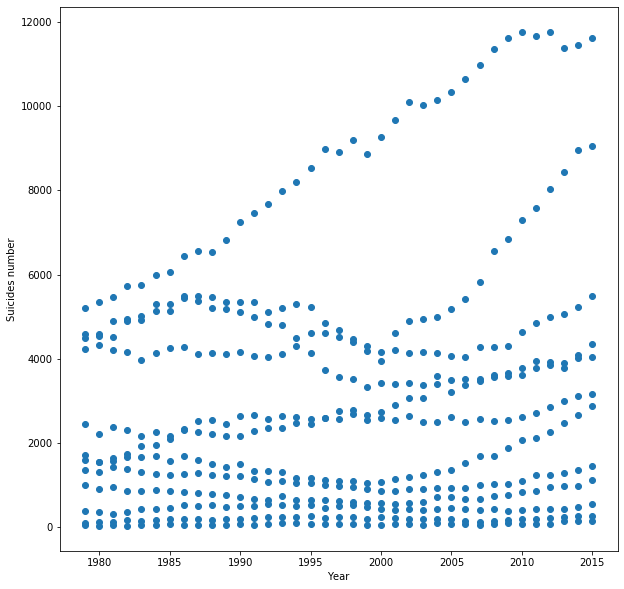

In [4]:
x = np.array(data.loc[:,'year']).reshape(-1,1)
y = np.array(data.loc[:,'suicides_no']).reshape(-1,1)
#Scatter Plot
plt.figure(figsize = [10,10])
plt.scatter(x=x,y=y,)
plt.xlabel('Year')
plt.ylabel('Suicides number')
plt.show()

## In this I have used Polynomial Regression for the visualisation
## Along with the linear Regression

female 5-14 years R^2 Score:  0.47401727890962014


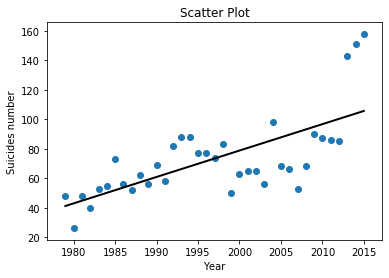

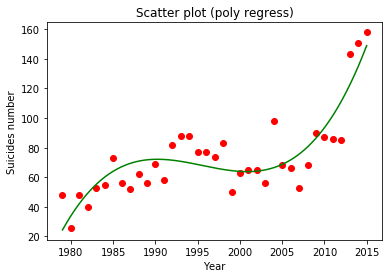

female 15-24 years R^2 Score:  0.0015138933397645937


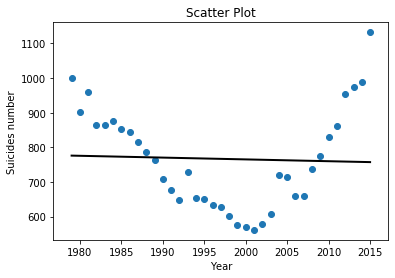

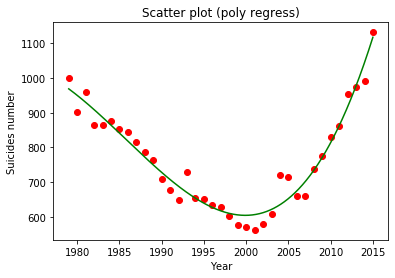

female 25-34 years R^2 Score:  0.13820398343939333


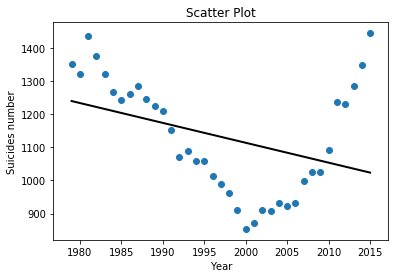

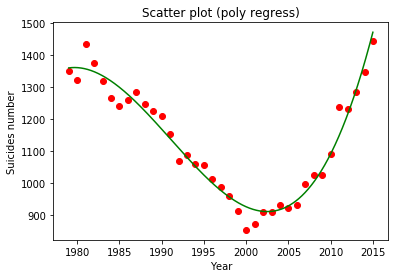

female 35-54 years R^2 Score:  0.8785416172252919


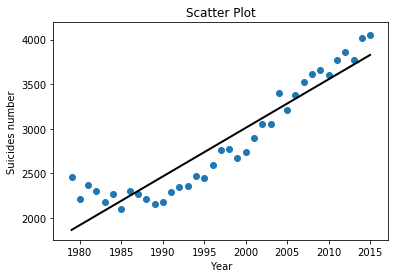

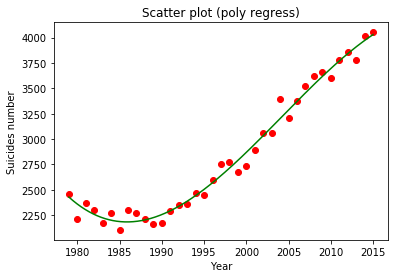

female 55-74 years R^2 Score:  0.1824478348701546


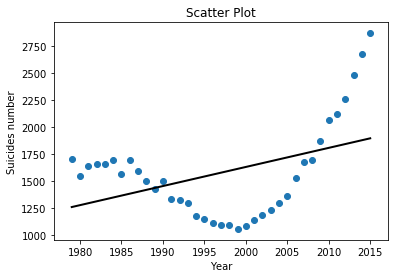

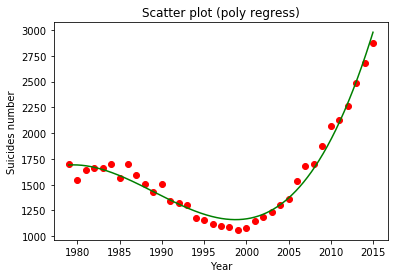

female 75+ years R^2 Score:  0.0006506794601899291


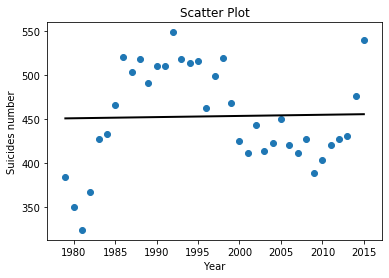

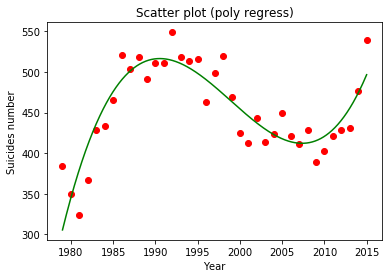

male 5-14 years R^2 Score:  0.20148301988516093


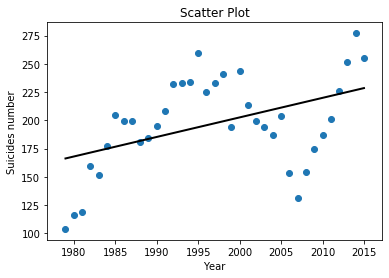

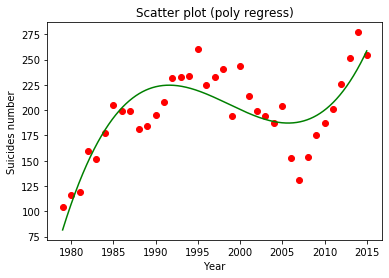

male 15-24 years R^2 Score:  0.26835973234332366


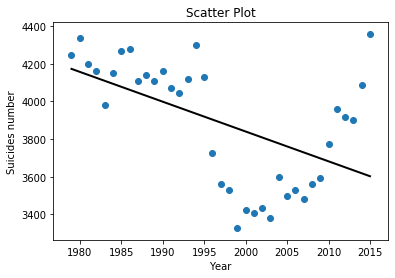

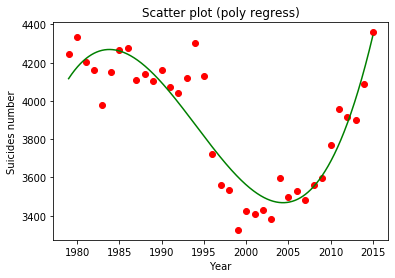

male 25-34 years R^2 Score:  0.11174351698149254


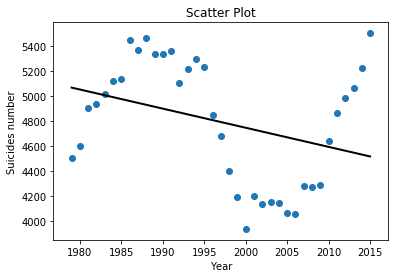

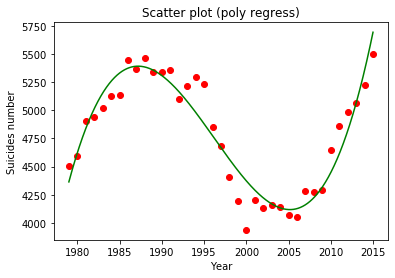

male 35-54 years R^2 Score:  0.983007605512513


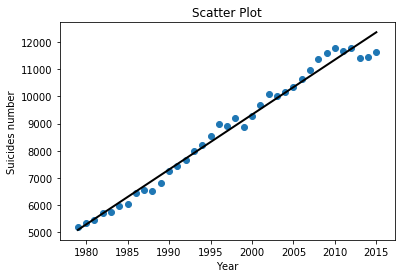

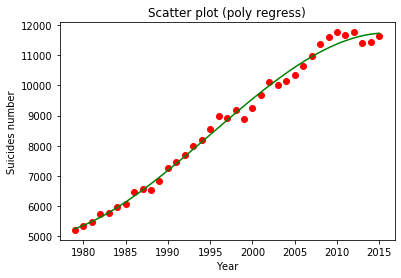

male 55-74 years R^2 Score:  0.47509987357758365


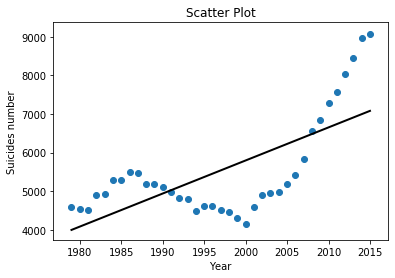

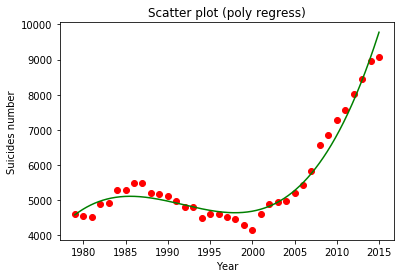

male 75+ years R^2 Score:  0.6318960754668643


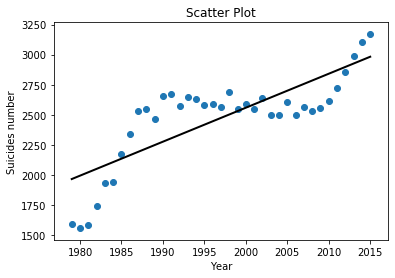

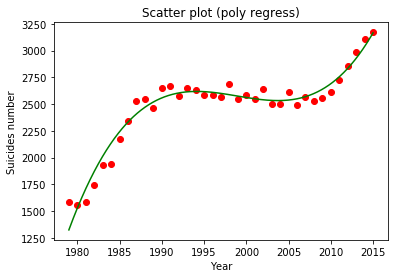

In [5]:
# Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)  # Prediction Space
#print(predict_space)
lis = ['female', 'male']
lis2 = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
for i in lis:
    for k in lis2:
        data_1 = data[data['sex'] == i]
        data_sex = data_1[data_1['age'] == k ]
        x_sex = np.array(data_sex.loc[:,'year']).reshape(-1,1)
        y_sex = np.array(data_sex.loc[:,'suicides_no']).reshape(-1,1)
        reg.fit(x_sex,y_sex)                                               # Fit
        predicted = reg.predict(predict_space)                             # Prediction
        print( i, k, 'R^2 Score: ', reg.score(x_sex,y_sex))                # R^2 calculation
        # print(i)
        #plt.figure(figsize = [9,6])
        #print(i,k)
        plt.plot(predict_space, predicted, color = 'black', linewidth = 2)
        plt.scatter(x_sex,y_sex)
        plt.title('Scatter Plot')
        plt.xlabel('Year')
        plt.ylabel('Suicides number')
        plt.show()
        
        #POlYnomial Regression
        
        from sklearn.preprocessing import PolynomialFeatures
        poly_reg = PolynomialFeatures(degree=4)
        X_poly = poly_reg.fit_transform(x_sex)
        poly_reg.fit(X_poly,y_sex)
        
        lin_reg_2 = LinearRegression()
        lin_reg_2.fit(X_poly,y_sex)
        
        X_grid=np.arange(min(x_sex),max(x_sex),0.01)
        X_grid = X_grid.reshape((len(X_grid),1))  
        plt.scatter(x_sex,y_sex,color = 'red')
        plt.plot(X_grid,lin_reg_2.predict(poly_reg.fit_transform(X_grid)),color='green')
        plt.title('Scatter plot (poly regress)')
        plt.xlabel('Year')
        plt.ylabel('Suicides number')
        plt.show()
        

        

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x_sex, y_sex, test_size=0.2, random_state=0)

female 5-14 years R^2 Score:  0.47401727890962014


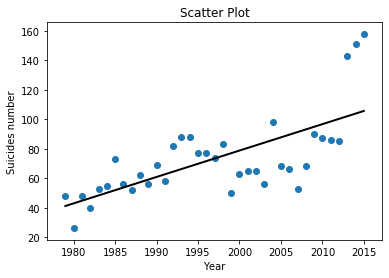

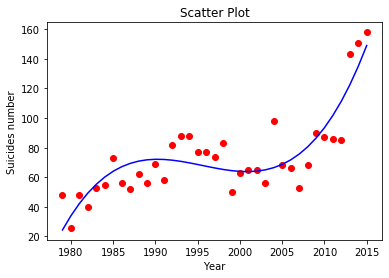

AttributeError: type object 'PolynomialFeatures' has no attribute 'predict'

In [26]:
# Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)  # Prediction Space
#print(predict_space)
lis = ['female', 'male']
lis2 = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
for i in lis:
    for k in lis2:
        data_1 = data[data['sex'] == i]
        data_sex = data_1[data_1['age'] == k ]
        x_sex = np.array(data_sex.loc[:,'year']).reshape(-1,1)
        y_sex = np.array(data_sex.loc[:,'suicides_no']).reshape(-1,1)
        reg.fit(x_sex,y_sex)                                               # Fit
        predicted = reg.predict(predict_space)                             # Prediction
        print( i, k, 'R^2 Score: ', reg.score(x_sex,y_sex))                # R^2 calculation
        # print(i)
        #plt.figure(figsize = [9,6])
        #print(i,k)
        plt.plot(predict_space, predicted, color = 'black', linewidth = 2)
        plt.scatter(x_sex,y_sex)
        plt.title('Scatter Plot')
        plt.xlabel('Year')
        plt.ylabel('Suicides number')
        plt.show()
# Fitting Polynomial Regression to the dataset
        from sklearn.preprocessing import PolynomialFeatures
        poly_reg = PolynomialFeatures(degree=4)
        X_poly = poly_reg.fit_transform(x_sex)
        pol_reg = LinearRegression()
        pol_reg.fit(X_poly, y_sex)
# Visualizing the Polymonial Regression results
        plt.scatter(x_sex, y_sex, color='red')
        plt.plot(x_sex, pol_reg.predict(poly_reg.fit_transform(x_sex)), color='blue')
        plt.title('Scatter Plot')
        plt.xlabel('Year')
        plt.ylabel('Suicides number')
        plt.show()
        poly_reg = PolynomialFeatures
        y_pred = poly_reg.predict(x_sex)
        from sklearn.metrics import r2_score
        r2 = r2_score(y_sex,y_pred)
        r2
    




